In [2]:
import pandas as pd
import numpy as np

Dataset [https://www.kaggle.com/CooperUnion/cardataset]

In [3]:
cars_df = pd.read_csv('../datasets/cars.csv')

In [4]:
cars_df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Rename columns

In [5]:
cars_df.columns = cars_df.columns.str.lower().str.replace(' ', '_')

In [6]:
cars_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Normalize string values, replace ' ' with '_'

In [7]:
cars_df.dtypes[cars_df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
strings = list(cars_df.dtypes[cars_df.dtypes=='object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    cars_df[col] = cars_df[col].str.lower().str.replace(' ','_')

cars_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### EDA

In [10]:
# for col in cars_df.columns:
# print(col)
print(cars_df['make'].unique())
print("Number of unique values: ", cars_df['make'].nunique())

['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']
Number of unique values:  48


##### PRICE DISTRIBUTION

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline

<p> This price histogram distribution (long tail, peak) is not good for ML training

<Axes: xlabel='msrp', ylabel='Count'>

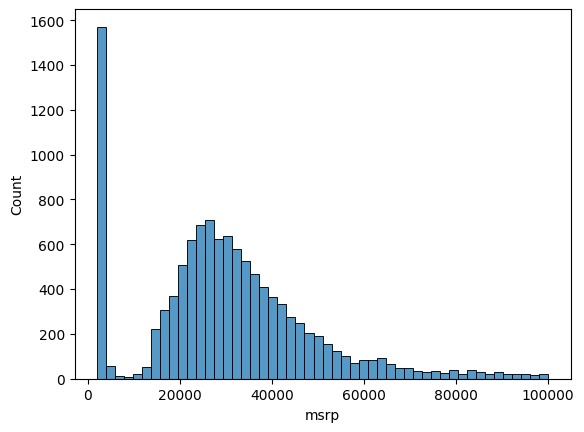

In [13]:
sns.histplot(cars_df.msrp[cars_df.msrp < 100000], bins=50)

<p> Need to apply logarithm to reduce long tail-> also results in bell curve

<Axes: xlabel='msrp', ylabel='Count'>

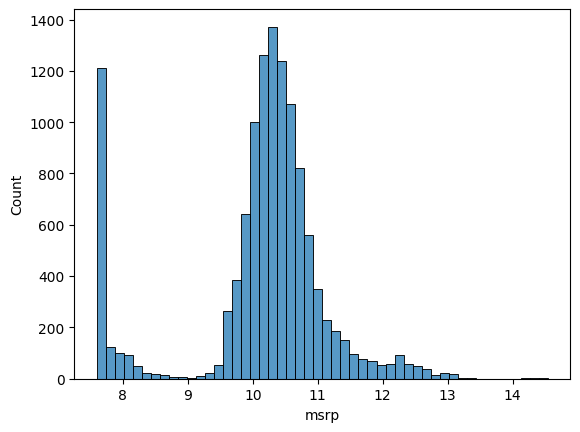

In [14]:
price_logarithmic = np.log1p(cars_df.msrp) #Use this function to avoid log(0) -> calculateion error
sns.histplot(price_logarithmic, bins=50)

### Missing Values

In [15]:
cars_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### TRAIN, VALUDATE, TEST SPLITS

In [16]:
n = len(cars_df)
n_val = n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n_train, n_val, n_test)

7150 2382 2382


<p>Shuffle the dataframe & datasets

In [17]:
idx = np.arange(n)
np.random.shuffle(idx)

In [18]:
df_train = cars_df.iloc[idx[:n_train]]
df_val = cars_df.iloc[idx[n_train:n_train+n_val]]
df_test = cars_df.iloc[idx[n_train+n_val:]]

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

<p> Apply logarithm to the msrp column

In [20]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

<p> Delete the msrp column as to not use them in model training

In [21]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [22]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,cadillac,escalade_hybrid,2011,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
1,lamborghini,gallardo,2014,premium_unleaded_(required),560.0,10.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,20,14,1158
2,gmc,sierra_1500_classic,2007,regular_unleaded,295.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,extended_cab_pickup,17,13,549
3,nissan,altima,2016,regular_unleaded,270.0,6.0,automatic,front_wheel_drive,4.0,performance,midsize,sedan,32,22,2009
4,lincoln,navigator,2016,regular_unleaded,380.0,6.0,automatic,rear_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61


### REGRESSION MODEL

In [23]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

### TRAIN MODEL

In [24]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
df_train[base].head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,332.0,8.0,23,20,1624
1,560.0,10.0,20,14,1158
2,295.0,8.0,17,13,549
3,270.0,6.0,32,22,2009
4,380.0,6.0,20,15,61


#### Extract values to use in training

In [25]:
X_train = df_train[base].values
X_train

array([[ 332.,    8.,   23.,   20., 1624.],
       [ 560.,   10.,   20.,   14., 1158.],
       [ 295.,    8.,   17.,   13.,  549.],
       ...,
       [ 332.,    8.,   23.,   20.,  549.],
       [ 220.,    8.,   17.,   13., 5657.],
       [ 355.,    8.,   22.,   16.,  549.]])

In [26]:
df_train[base].isnull().sum()

engine_hp           37
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [27]:
X_train = df_train[base].fillna(0).values # fill in with 0 values may not always be the right step

In [28]:
print(X_train)
print(y_train)

[[ 332.    8.   23.   20. 1624.]
 [ 560.   10.   20.   14. 1158.]
 [ 295.    8.   17.   13.  549.]
 ...
 [ 332.    8.   23.   20.  549.]
 [ 220.    8.   17.   13. 5657.]
 [ 355.    8.   22.   16.  549.]]
[11.36135811 12.21602793 10.36520696 ... 10.79088486  8.06746267
 10.87456945]


In [29]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(np.float64(7.482094555486117),
 array([ 9.46596230e-03, -1.24736734e-01,  4.57007583e-02, -1.00697702e-02,
        -1.63658120e-05]))

In [30]:
y_pred = w0 + X_train.dot(w)
y_pred

array([10.45004412, 12.28975287,  9.91368061, ..., 10.46763737,
        9.12013687, 10.67993283])

<Axes: ylabel='Count'>

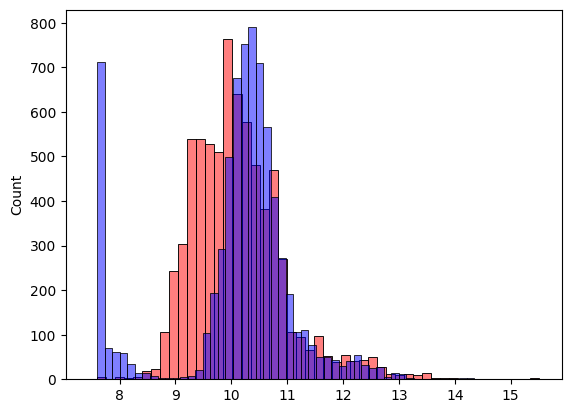

In [31]:
sns.histplot(y_pred, color='red', alpha=0.5,bins=50)
sns.histplot(y_train, color='blue', alpha=0.5,bins=50)

### Root Mean Squared Error

In [32]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [33]:
rmse(y_train, y_pred)

np.float64(0.7399346763441612)

In [34]:
# Training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# Validation
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

#Evaluation part
rmse(y_val, y_pred)

np.float64(0.7515271709262847)

### FEATURE ENGINEERING

In [35]:
# Adding Age as model feature
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df = df.copy()
     
    df['age'] = 2024 - df.year
    features = base + ['age']
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [36]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5258739913601318)

<Axes: ylabel='Count'>

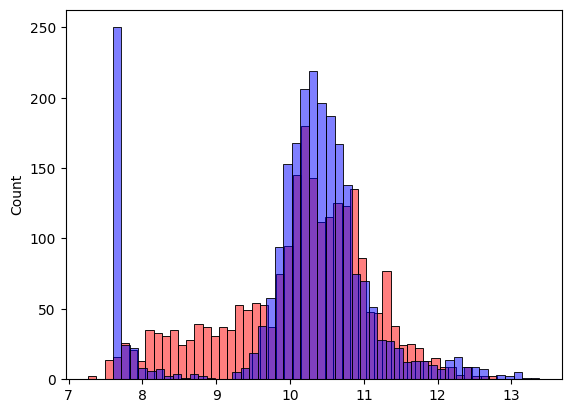

In [37]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### ONE HOT ENCODING

In [38]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [40]:
# We want to encode the number_of_doors columns
# By adding columns to each of the unique values of doors
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    # This loop is adding columns from number_of_doors
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [41]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5249984692576407)

<p> This does not improve the performance of the model by much
<p> Let's try using make column as model training

In [46]:
makes = list(cars_df.make.value_counts().head().index)


In [47]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
         
    # From those 5 most values, do one hot encoding
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [48]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5135439793646156)

<p> Now let's try using all the categorical variable

In [50]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

categories = {}

for c in categorical_variables:
    categories[c] = list(cars_df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [51]:
def prepare_X(df):
    # this is good way to do, otherwise while using df you'll modify the original data
    # what is mostly not wanted
    df = df.copy()
    features = base.copy()
     
    df['age'] = 2017 - df.year
    features.append('age')
     
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
 
    # First loop is for each key of the dictionary categories.
    # Second loop is for each value inside the categories
    # For each of this values we create a new column.
    for c, values in categories.items():    
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
     
    df_num = df[features]
    df_num = df_num.fillna(0)
    # extracting the Numpy array
    X = df_num.values
    return X

In [52]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(180.371608547564)

<Axes: ylabel='Count'>

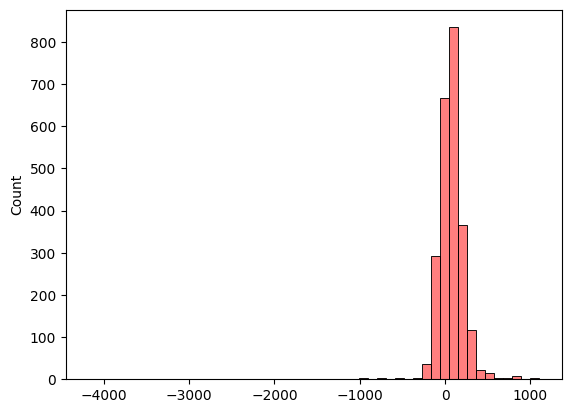

In [53]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

<p> Something went wrong, the model perform worse

### Regularization

In [55]:
# reg = regularized
# parameter r = short for regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
     
    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
     
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
     
    return w_full[0], w_full[1:]

In [56]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
rmse(y_val, y_pred)

np.float64(0.4631963329230935)

<Axes: ylabel='Count'>

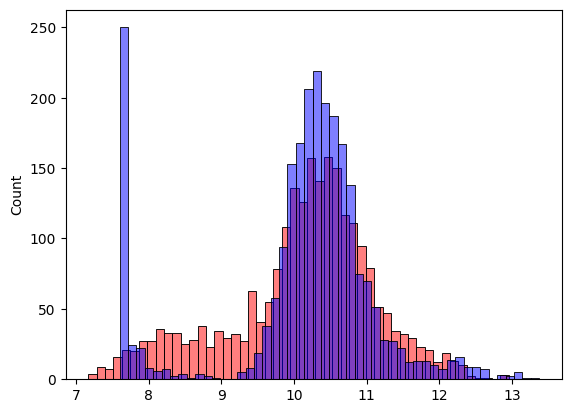

In [57]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

### TUNING MODEL

In [58]:
# Let's find the best regularization parameter r
for r in [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
 
    score = rmse(y_val, y_pred)
     
    print("reg parameter: ",r, "bias term: ",w0, "rmse: ",score)

reg parameter:  0.0 bias term:  -9039299553931892.0 rmse:  180.371608547564
reg parameter:  1e-05 bias term:  7.728903151846856 rmse:  0.4632124096182034
reg parameter:  0.0001 bias term:  6.768144808600478 rmse:  0.4632122108796255
reg parameter:  0.001 bias term:  6.815770188745286 rmse:  0.4632107204551602
reg parameter:  0.01 bias term:  6.801426520162415 rmse:  0.4631963329230935
reg parameter:  0.1 bias term:  6.6664462123431285 rmse:  0.4631005378383813
reg parameter:  1 bias term:  5.867097656058184 rmse:  0.4641894907924498
reg parameter:  10 bias term:  4.217472603715262 rmse:  0.48493236133051126


In [59]:
# Let's use 0.1 as it has the least error
r = 0.1
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
 
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
 
score = rmse(y_val, y_pred)
    
print("rmse: ",score)

rmse:  0.4631005378383813


In [60]:
# Now let's train the model with train+val dataset
df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train, y_val])

In [61]:
df_full_train = df_full_train.reset_index(drop=True)

In [62]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[332.,   8.,  23., ...,   0.,   0.,   0.],
       [560.,  10.,  20., ...,   1.,   0.,   0.],
       [295.,   8.,  17., ...,   0.,   0.,   0.],
       ...,
       [354.,   6.,  24., ...,   0.,   0.,   0.],
       [167.,   4.,  28., ...,   0.,   1.,   0.],
       [116.,   4.,  22., ...,   0.,   0.,   0.]])

In [63]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, 0.1)
w0, w

(np.float64(6.65283317914012),
 array([ 1.53955882e-03,  1.04540947e-01, -3.41949629e-02,  1.29135326e-02,
        -4.96344675e-05, -1.01197147e-01, -8.64349974e-01, -1.02629673e+00,
        -7.38257215e-01, -2.91972059e-02,  1.65083506e-01,  1.00952377e-02,
        -1.31534538e-01, -9.62956052e-02, -4.68703478e-01,  6.44118036e-02,
        -3.23406607e-01, -5.24909705e-01,  1.49489890e-02,  1.10266127e+00,
         9.42882099e-01,  1.14101180e+00,  2.89980936e+00,  5.66468702e-01,
         1.75743800e+00,  1.60288053e+00,  1.70728565e+00,  1.58522906e+00,
        -7.96584728e-02,  1.49416165e-02, -2.92683209e-02, -7.97384318e-03,
         4.63353767e-03,  2.29088955e+00,  2.18511315e+00,  2.17683050e+00,
         2.84876464e-02,  3.65773896e-02,  2.09009138e-01,  3.53497228e-01,
        -1.12912323e-01]))

In [64]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
 
score = rmse(y_test, y_pred)
    
print("rmse: ",score)

rmse:  0.5121488227864721


In [65]:
# 0.5121488227864721 vs 0.4631005378383813

In [68]:
# Now let's try and predict the price of a new car
new_car = df_test.iloc[59].to_dict()

In [69]:
df_new_car = pd.DataFrame([new_car])
df_new_car

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mercedes-benz,c36_amg,1997,regular_unleaded,276.0,6.0,automatic,rear_wheel_drive,4.0,"factory_tuner,luxury,performance",compact,sedan,22,16,617


In [71]:
X_small = prepare_X(df_new_car)
y_pred = w0 + X_small.dot(w)


In [73]:
np.expm1(y_pred[0])

np.float64(7499.427742677652)

In [74]:
np.expm1(y_test[59])

np.float64(4330.000000000001)